# Common problems faced by neural networks

When working with neural networks, you can face some problems. Por example: sometimes, your model may be really good when predicting your training datasets, but performing poorly when seeing completely different data. Sometimes, it just doesn't perform well at all, having a huge loss, not being able to predict data correctly. 

Sometimes you do not have enough data to train your model, or your data is too disperse, the values are too different from each other, your model takes a long time to train, the list goes on.

We will explore some of these problems, and apply some techniques to fix, and prevent them from happening.

## Underfitting

When your neural net is not performing well in it's own training set, and even worse in data that it has never seen before is a phenom called underfitting. There are a lot of techniques that we can use to solve underfitting, and usually we have to analyze what is wrong with our model or data, and apply the correct technique to fix it.

Let's take a look at a neural network that is suffering from underfitting:

In [1]:
## Import the necesary packages
import numpy as np
import keras
from matplotlib import pyplot as plt
 
from keras.layers import Dense, Input, Dropout
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
## We will use the boston housing dataset in this example. Let's separate the data into training and test datases.
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
## Let's build a very simple network, with just one hidden layer with only two neurons inside it
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(2, activation='relu', name='fc1')(inputs)
  outputs = Dense(1, activation='linear', name='fc3')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 2)                 28        
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 3         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
## And let's train it using only 50 epochs:
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=50,
        batch_size=32)

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 548us/step - loss: 157386.8368 - mae: 384.1159 - val_loss: 166823.3814 - val_mae: 393.3013
Epoch 2/50
404/404 [==============================] - 0s 58us/step - loss: 156800.1921 - mae: 383.3947 - val_loss: 166218.4703 - val_mae: 392.5757
Epoch 3/50
404/404 [==============================] - 0s 59us/step - loss: 156220.5894 - mae: 382.6765 - val_loss: 165610.6777 - val_mae: 391.8456
Epoch 4/50
404/404 [==============================] - 0s 60us/step - loss: 155645.1773 - mae: 381.9559 - val_loss: 165002.0941 - val_mae: 391.1132
Epoch 5/50
404/404 [==============================] - 0s 94us/step - loss: 155060.8495 - mae: 381.2338 - val_loss: 164404.8707 - val_mae: 390.3929
Epoch 6/50
404/404 [==============================] - 0s 63us/step - loss: 154491.4144 - mae: 380.5194 - val_loss: 163799.7938 - val_mae: 389.6621
Epoch 7/50
404/404 [==============================] - 0s 58us/step - lo

102/102 [==============================] - 0s 66us/step
Mean absolute error: 359.0670166015625
Mean squared error: 139482.84880514705


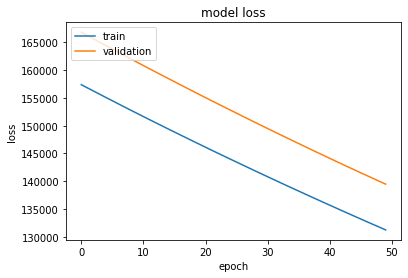

In [5]:
## Ok, now let's calculate the error of the network and plot it:
test_mse_score, test_mae_score = net.evaluate(x_test, y_test)
print("Mean absolute error:",test_mae_score)
print("Mean squared error:",test_mse_score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


As we can see, our errors are enourmous. Remember, when analyzing this kind of graphic, the lower the validation loss, the better our model is, and in this case, the error is really big. We must improve our network somehow, or else it will perform very poorly when exposed to data it has never seen before.

In the network exposed above, we have two serious mistakes:

- The network is very simple. Just a layer with two neurons is not enough, we must add complexity. Some more layers with more neurons should do the trick;

- We are not training it for long enough. We are only making ten training iterations, we need to train it for longer.

In [6]:
## Let's try again. What about a lot of layers and neurons?
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(512, activation='relu', name='fc1')(inputs)
  model = Dense(512, activation='relu', name='fc2')(model)
  model = Dense(512, activation='relu', name='fc3')(model)
  model = Dense(512, activation='relu', name='fc4')(model)
  model = Dense(512, activation='relu', name='fc5')(model)
  model = Dense(512, activation='relu', name='fc6')(model)
  model = Dense(512, activation='relu', name='fc7')(model)
    
  outputs = Dense(1, activation='linear', name='fc8')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               7168      
_________________________________________________________________
fc2 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc3 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc4 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc5 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc6 (Dense)                  (None, 512)               2626

In [7]:
## Let's add a lot of epochs. What can go wrong?
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=500,
        batch_size=32)

Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 1s 2ms/step - loss: 253.6206 - mae: 12.7808 - val_loss: 135.3714 - val_mae: 9.2316
Epoch 2/500
404/404 [==============================] - 0s 1ms/step - loss: 90.1128 - mae: 6.9518 - val_loss: 77.8763 - val_mae: 6.2416
Epoch 3/500
404/404 [==============================] - 0s 983us/step - loss: 69.2143 - mae: 5.8775 - val_loss: 63.4531 - val_mae: 6.1542
Epoch 4/500
404/404 [==============================] - 0s 1ms/step - loss: 63.4974 - mae: 5.5552 - val_loss: 62.7061 - val_mae: 5.8800
Epoch 5/500
404/404 [==============================] - 0s 1ms/step - loss: 62.2795 - mae: 5.6142 - val_loss: 63.5677 - val_mae: 5.7820
Epoch 6/500
404/404 [==============================] - 0s 1ms/step - loss: 60.2252 - mae: 5.3794 - val_loss: 60.5994 - val_mae: 5.7729
Epoch 7/500
404/404 [==============================] - 0s 1ms/step - loss: 59.4182 - mae: 5.3524 - val_loss: 60.7363 - val_mae: 5.7463
Epoc

404/404 [==============================] - 0s 994us/step - loss: 24.6748 - mae: 3.5304 - val_loss: 32.7748 - val_mae: 4.1332
Epoch 61/500
404/404 [==============================] - 0s 985us/step - loss: 24.0456 - mae: 3.5453 - val_loss: 40.2711 - val_mae: 4.4885
Epoch 62/500
404/404 [==============================] - 0s 999us/step - loss: 26.7734 - mae: 3.6507 - val_loss: 31.0388 - val_mae: 3.9669
Epoch 63/500
404/404 [==============================] - 0s 984us/step - loss: 22.2319 - mae: 3.3864 - val_loss: 30.8193 - val_mae: 3.8098
Epoch 64/500
404/404 [==============================] - 0s 1ms/step - loss: 22.9905 - mae: 3.3794 - val_loss: 37.8983 - val_mae: 4.7641
Epoch 65/500
404/404 [==============================] - 0s 972us/step - loss: 22.3204 - mae: 3.4047 - val_loss: 32.0783 - val_mae: 3.9208
Epoch 66/500
404/404 [==============================] - 0s 974us/step - loss: 20.4930 - mae: 3.2537 - val_loss: 31.3743 - val_mae: 3.8566
Epoch 67/500
404/404 [===========================

404/404 [==============================] - 0s 978us/step - loss: 15.8421 - mae: 2.8599 - val_loss: 30.8445 - val_mae: 3.9148
Epoch 120/500
404/404 [==============================] - 0s 964us/step - loss: 20.5739 - mae: 3.3481 - val_loss: 45.9425 - val_mae: 4.8999
Epoch 121/500
404/404 [==============================] - 0s 961us/step - loss: 24.3758 - mae: 3.4495 - val_loss: 27.8371 - val_mae: 3.6900
Epoch 122/500
404/404 [==============================] - 0s 957us/step - loss: 15.1981 - mae: 2.8290 - val_loss: 25.3139 - val_mae: 3.5141
Epoch 123/500
404/404 [==============================] - 0s 982us/step - loss: 13.5630 - mae: 2.7442 - val_loss: 30.5098 - val_mae: 3.6992
Epoch 124/500
404/404 [==============================] - 0s 969us/step - loss: 13.6577 - mae: 2.6537 - val_loss: 31.1583 - val_mae: 3.6998
Epoch 125/500
404/404 [==============================] - 0s 978us/step - loss: 12.0859 - mae: 2.5128 - val_loss: 31.8478 - val_mae: 3.8823
Epoch 126/500
404/404 [==================

404/404 [==============================] - 0s 964us/step - loss: 10.6999 - mae: 2.3252 - val_loss: 27.5241 - val_mae: 3.4462
Epoch 179/500
404/404 [==============================] - 0s 1ms/step - loss: 15.2445 - mae: 2.7821 - val_loss: 35.4309 - val_mae: 4.0737
Epoch 180/500
404/404 [==============================] - 0s 1ms/step - loss: 13.9652 - mae: 2.6859 - val_loss: 29.7414 - val_mae: 3.8416
Epoch 181/500
404/404 [==============================] - 0s 1ms/step - loss: 12.7865 - mae: 2.5281 - val_loss: 28.2440 - val_mae: 3.4811
Epoch 182/500
404/404 [==============================] - 0s 1ms/step - loss: 11.7047 - mae: 2.4846 - val_loss: 26.3982 - val_mae: 3.4123
Epoch 183/500
404/404 [==============================] - 0s 1ms/step - loss: 12.4278 - mae: 2.4774 - val_loss: 27.7415 - val_mae: 3.4740
Epoch 184/500
404/404 [==============================] - 0s 981us/step - loss: 14.7034 - mae: 2.8198 - val_loss: 28.8861 - val_mae: 3.7448
Epoch 185/500
404/404 [============================

404/404 [==============================] - 0s 979us/step - loss: 8.7153 - mae: 2.1106 - val_loss: 25.4533 - val_mae: 3.4022
Epoch 238/500
404/404 [==============================] - 0s 996us/step - loss: 9.2121 - mae: 2.1535 - val_loss: 29.2776 - val_mae: 3.5867
Epoch 239/500
404/404 [==============================] - 0s 1ms/step - loss: 8.8439 - mae: 2.1764 - val_loss: 24.7216 - val_mae: 3.2813
Epoch 240/500
404/404 [==============================] - 0s 983us/step - loss: 8.7376 - mae: 2.0840 - val_loss: 27.3619 - val_mae: 3.4523
Epoch 241/500
404/404 [==============================] - 0s 1ms/step - loss: 10.2606 - mae: 2.2963 - val_loss: 33.9288 - val_mae: 4.2836
Epoch 242/500
404/404 [==============================] - 0s 952us/step - loss: 11.5808 - mae: 2.4388 - val_loss: 26.0799 - val_mae: 3.3671
Epoch 243/500
404/404 [==============================] - 0s 989us/step - loss: 9.3600 - mae: 2.2249 - val_loss: 33.6293 - val_mae: 3.9006
Epoch 244/500
404/404 [===========================

404/404 [==============================] - 0s 979us/step - loss: 9.9419 - mae: 2.2919 - val_loss: 25.7264 - val_mae: 3.2572
Epoch 297/500
404/404 [==============================] - 0s 970us/step - loss: 8.3030 - mae: 2.0485 - val_loss: 25.3756 - val_mae: 3.2629
Epoch 298/500
404/404 [==============================] - 0s 994us/step - loss: 7.6273 - mae: 1.9982 - val_loss: 23.6131 - val_mae: 3.2177
Epoch 299/500
404/404 [==============================] - 0s 1ms/step - loss: 8.6066 - mae: 2.1404 - val_loss: 25.7451 - val_mae: 3.4301
Epoch 300/500
404/404 [==============================] - 0s 1ms/step - loss: 10.3132 - mae: 2.2328 - val_loss: 27.3149 - val_mae: 3.6829
Epoch 301/500
404/404 [==============================] - 0s 979us/step - loss: 9.6239 - mae: 2.2180 - val_loss: 27.7773 - val_mae: 3.5786
Epoch 302/500
404/404 [==============================] - 0s 1ms/step - loss: 9.2017 - mae: 2.2246 - val_loss: 23.8002 - val_mae: 3.4445
Epoch 303/500
404/404 [==============================

Epoch 356/500
404/404 [==============================] - 0s 1ms/step - loss: 6.7039 - mae: 1.9503 - val_loss: 24.9920 - val_mae: 3.3407
Epoch 357/500
404/404 [==============================] - 0s 996us/step - loss: 7.5992 - mae: 2.0044 - val_loss: 26.7815 - val_mae: 3.2078
Epoch 358/500
404/404 [==============================] - 0s 1ms/step - loss: 8.0985 - mae: 2.0784 - val_loss: 29.4505 - val_mae: 3.7637
Epoch 359/500
404/404 [==============================] - 0s 988us/step - loss: 7.1958 - mae: 1.9505 - val_loss: 26.8291 - val_mae: 3.3114
Epoch 360/500
404/404 [==============================] - 0s 1ms/step - loss: 10.1002 - mae: 2.2264 - val_loss: 30.4956 - val_mae: 3.8369
Epoch 361/500
404/404 [==============================] - 0s 1ms/step - loss: 8.0941 - mae: 1.9903 - val_loss: 26.0410 - val_mae: 3.3657
Epoch 362/500
404/404 [==============================] - 0s 1ms/step - loss: 8.0759 - mae: 2.0528 - val_loss: 32.4119 - val_mae: 3.8906
Epoch 363/500
404/404 [====================

Epoch 416/500
404/404 [==============================] - 0s 997us/step - loss: 7.3905 - mae: 1.9923 - val_loss: 27.3760 - val_mae: 3.3720
Epoch 417/500
404/404 [==============================] - 0s 968us/step - loss: 7.2546 - mae: 1.8250 - val_loss: 26.1737 - val_mae: 3.3101
Epoch 418/500
404/404 [==============================] - 0s 971us/step - loss: 7.6523 - mae: 2.0196 - val_loss: 24.4682 - val_mae: 3.2587
Epoch 419/500
404/404 [==============================] - 0s 975us/step - loss: 7.6855 - mae: 1.9584 - val_loss: 24.7027 - val_mae: 3.2086
Epoch 420/500
404/404 [==============================] - 0s 987us/step - loss: 6.6872 - mae: 1.8378 - val_loss: 24.2352 - val_mae: 3.2551
Epoch 421/500
404/404 [==============================] - 0s 993us/step - loss: 5.9656 - mae: 1.7539 - val_loss: 29.3259 - val_mae: 3.4849
Epoch 422/500
404/404 [==============================] - 0s 984us/step - loss: 5.9420 - mae: 1.7776 - val_loss: 26.1066 - val_mae: 3.2860
Epoch 423/500
404/404 [===========

Epoch 476/500
404/404 [==============================] - 0s 977us/step - loss: 8.0438 - mae: 2.0181 - val_loss: 28.7045 - val_mae: 3.4041
Epoch 477/500
404/404 [==============================] - 0s 976us/step - loss: 7.0058 - mae: 1.9643 - val_loss: 24.6772 - val_mae: 3.3987
Epoch 478/500
404/404 [==============================] - 0s 991us/step - loss: 6.4527 - mae: 1.8300 - val_loss: 29.1241 - val_mae: 3.4491
Epoch 479/500
404/404 [==============================] - 0s 956us/step - loss: 5.9917 - mae: 1.7592 - val_loss: 24.7310 - val_mae: 3.2186
Epoch 480/500
404/404 [==============================] - 0s 950us/step - loss: 5.1030 - mae: 1.6300 - val_loss: 25.0132 - val_mae: 3.2923
Epoch 481/500
404/404 [==============================] - 0s 973us/step - loss: 6.2936 - mae: 1.7488 - val_loss: 25.8611 - val_mae: 3.2416
Epoch 482/500
404/404 [==============================] - 0s 1ms/step - loss: 5.9778 - mae: 1.8150 - val_loss: 24.4109 - val_mae: 3.3420
Epoch 483/500
404/404 [=============

102/102 [==============================] - 0s 144us/step
Mean absolute error: 3.4466681480407715
Mean squared error: 28.643587748209637


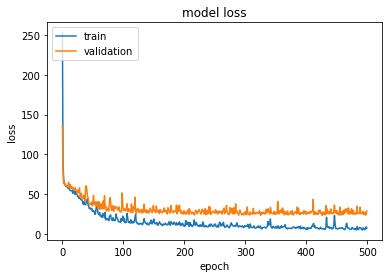

In [8]:
## Let's see how it behaves:
test_mse_score, test_mae_score = net.evaluate(x_test, y_test)
print("Mean absolute error:",test_mae_score)
print("Mean squared error:",test_mse_score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

If you take a closer look at the graph above, you are seeing a clear example of overfitting. When you compare your train and validation losses, you should have in mind that:

- It's normal for there to be a small difference between them.
- If both metrics are moving in the same direction, everything is fine.
- If the validation metric begins to stagnate while the training metric continues to improve, you are probably close to overfitting.
- If the validation metric is going in the wrong direction, the model is clearly overfitting.

## Overfitting

Overfitting is what happens when your model becomes so good at learning it's training dataset that it becomes bad at analyzing data that it has never seen before. In deep learning, fitting your model to your dataset is not a big deal. The real challenge lies in generalizing your model, making it good at predicting data that is outside of it's test dataset.

The issues with our previous neural network are the following:

- It is a lot more complex than it should be. We need to redesign it.
- We need to lower our epochs
- We are not using any regularization techniques.

Let's start by fixing the easiest problems:

In [9]:
## Let's use a more reasonable architecture this time.
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(32, activation='relu', name='fc1')(inputs)
  model = Dense(32, activation='relu', name='fc2')(model)
    
  outputs = Dense(1, activation='linear', name='fc3')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 32)                448       
_________________________________________________________________
fc2 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
## Let's also lower our epochs.
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=200,
        batch_size=32)

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 0s 476us/step - loss: 2328.9838 - mae: 36.6634 - val_loss: 2175.6198 - val_mae: 35.4676
Epoch 2/200
404/404 [==============================] - 0s 72us/step - loss: 1999.8153 - mae: 33.3560 - val_loss: 1840.4351 - val_mae: 32.2446
Epoch 3/200
404/404 [==============================] - 0s 58us/step - loss: 1711.8088 - mae: 30.3391 - val_loss: 1555.9911 - val_mae: 29.5425
Epoch 4/200
404/404 [==============================] - 0s 62us/step - loss: 1458.4798 - mae: 27.8404 - val_loss: 1325.7895 - val_mae: 27.2620
Epoch 5/200
404/404 [==============================] - 0s 59us/step - loss: 1255.2404 - mae: 25.7427 - val_loss: 1129.9630 - val_mae: 25.2247
Epoch 6/200
404/404 [==============================] - 0s 58us/step - loss: 1086.0648 - mae: 23.9996 - val_loss: 964.3101 - val_mae: 23.3994
Epoch 7/200
404/404 [==============================] - 0s 59us/step - loss: 941.7374 - mae: 22.3972 - 

404/404 [==============================] - 0s 59us/step - loss: 92.1297 - mae: 7.0657 - val_loss: 84.1976 - val_mae: 6.9767
Epoch 60/200
404/404 [==============================] - 0s 58us/step - loss: 90.8433 - mae: 7.0386 - val_loss: 83.3431 - val_mae: 6.9399
Epoch 61/200
404/404 [==============================] - 0s 56us/step - loss: 89.6315 - mae: 6.9817 - val_loss: 82.7369 - val_mae: 6.9089
Epoch 62/200
404/404 [==============================] - 0s 58us/step - loss: 88.3990 - mae: 6.9219 - val_loss: 82.1381 - val_mae: 6.8784
Epoch 63/200
404/404 [==============================] - 0s 58us/step - loss: 87.2188 - mae: 6.8897 - val_loss: 81.2489 - val_mae: 6.8482
Epoch 64/200
404/404 [==============================] - 0s 62us/step - loss: 85.9779 - mae: 6.8481 - val_loss: 80.4200 - val_mae: 6.8244
Epoch 65/200
404/404 [==============================] - 0s 58us/step - loss: 84.8954 - mae: 6.8314 - val_loss: 79.6078 - val_mae: 6.7982
Epoch 66/200
404/404 [==============================] 

404/404 [==============================] - 0s 57us/step - loss: 57.1578 - mae: 5.4904 - val_loss: 62.7193 - val_mae: 5.9700
Epoch 119/200
404/404 [==============================] - 0s 59us/step - loss: 57.0339 - mae: 5.4458 - val_loss: 62.7593 - val_mae: 5.9583
Epoch 120/200
404/404 [==============================] - 0s 59us/step - loss: 56.8393 - mae: 5.4509 - val_loss: 62.4678 - val_mae: 5.9616
Epoch 121/200
404/404 [==============================] - 0s 57us/step - loss: 56.6950 - mae: 5.4530 - val_loss: 62.3735 - val_mae: 5.9563
Epoch 122/200
404/404 [==============================] - 0s 60us/step - loss: 56.5337 - mae: 5.4543 - val_loss: 62.1957 - val_mae: 5.9552
Epoch 123/200
404/404 [==============================] - 0s 92us/step - loss: 56.3151 - mae: 5.4298 - val_loss: 62.2358 - val_mae: 5.9371
Epoch 124/200
404/404 [==============================] - 0s 61us/step - loss: 56.1796 - mae: 5.4107 - val_loss: 62.1069 - val_mae: 5.9328
Epoch 125/200
404/404 [=========================

404/404 [==============================] - 0s 58us/step - loss: 51.6126 - mae: 5.0504 - val_loss: 59.3135 - val_mae: 5.6553
Epoch 178/200
404/404 [==============================] - 0s 60us/step - loss: 51.2779 - mae: 5.0509 - val_loss: 59.1327 - val_mae: 5.6677
Epoch 179/200
404/404 [==============================] - 0s 64us/step - loss: 51.3039 - mae: 5.1106 - val_loss: 59.0560 - val_mae: 5.6685
Epoch 180/200
404/404 [==============================] - 0s 66us/step - loss: 51.2232 - mae: 5.0640 - val_loss: 59.2017 - val_mae: 5.6499
Epoch 181/200
404/404 [==============================] - 0s 57us/step - loss: 51.1567 - mae: 5.0527 - val_loss: 59.0850 - val_mae: 5.6521
Epoch 182/200
404/404 [==============================] - 0s 62us/step - loss: 51.1938 - mae: 5.0160 - val_loss: 59.1640 - val_mae: 5.6380
Epoch 183/200
404/404 [==============================] - 0s 57us/step - loss: 50.9810 - mae: 5.0284 - val_loss: 58.9275 - val_mae: 5.6459
Epoch 184/200
404/404 [=========================

102/102 [==============================] - 0s 70us/step
Mean absolute error: 5.606158256530762
Mean squared error: 58.21692343319164


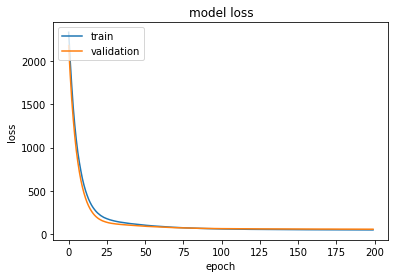

In [11]:
## And let's plot the losses graph once more:
test_mse_score, test_mae_score = net.evaluate(x_test, y_test)
print("Mean absolute error:",test_mae_score)
print("Mean squared error:",test_mse_score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Now it looks really better. But there is something you should notice here. Do you see how the losses are not changing much after the epoch 75, give or take? This is a perfect opportunity to apply a technique called **early stopping**.

## Early stopping

Early stopping is basically stopping is basically lowering the amount of epochs you are training your model for. Since the model is not improving much after around epoch 75, maybe we should lower our amount of epochs.

In [12]:
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(32, activation='relu', name='fc1')(inputs)
  model = Dense(32, activation='relu', name='fc2')(model)
    
  outputs = Dense(1, activation='linear', name='fc3')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

## Let's use half of the epochs we did before.
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=100, 
        batch_size=32)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 32)                448       
_________________________________________________________________
fc2 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 497us/step - loss: 10274.3995 - mae: 94.4800 - val_loss: 10579.3800 - val_mae: 95.8816
Epoch 2/100
404/404 [==============================] - 0s 6

404/404 [==============================] - 0s 56us/step - loss: 226.6261 - mae: 12.2307 - val_loss: 187.8726 - val_mae: 11.7032
Epoch 53/100
404/404 [==============================] - 0s 55us/step - loss: 221.8997 - mae: 12.0631 - val_loss: 183.6907 - val_mae: 11.5593
Epoch 54/100
404/404 [==============================] - 0s 58us/step - loss: 217.3397 - mae: 11.9207 - val_loss: 179.7092 - val_mae: 11.4204
Epoch 55/100
404/404 [==============================] - 0s 58us/step - loss: 213.1811 - mae: 11.7822 - val_loss: 176.0564 - val_mae: 11.2861
Epoch 56/100
404/404 [==============================] - 0s 57us/step - loss: 209.2078 - mae: 11.6448 - val_loss: 173.0621 - val_mae: 11.1655
Epoch 57/100
404/404 [==============================] - 0s 60us/step - loss: 205.3431 - mae: 11.5236 - val_loss: 169.4981 - val_mae: 11.0460
Epoch 58/100
404/404 [==============================] - 0s 56us/step - loss: 201.7008 - mae: 11.4050 - val_loss: 166.6940 - val_mae: 10.9380
Epoch 59/100
404/404 [====

102/102 [==============================] - 0s 79us/step
Mean absolute error: 8.897459030151367
Mean squared error: 114.99846335018383


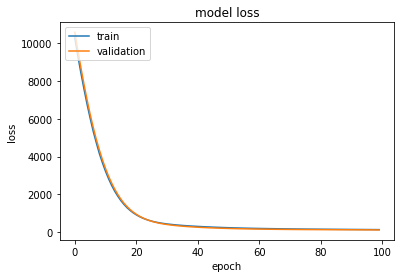

In [13]:
## And analyze the results:
test_mse_score, test_mae_score = net.evaluate(x_test, y_test)
print("Mean absolute error:",test_mae_score)
print("Mean squared error:",test_mse_score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In the example above, applying early stopping to our model not only saved some time and computing power, but also lowered our loss.

Now, let's get back to our over complex example, apply regularization to it and see what happens:

## Regularization

The main idea behind regularization is to reduce overfitting. Among the popular regularization techniques, que have L1 and L2, which penalize complex models by adding a value to the error function when the weights are high. We also have the dropout technique, which randomly disables a few neurons inside our network. By doing this, our network will not behave in the same way it would if all neurons were enabled, thus making it skip a few steps it would normally take, and because of it, become less atached to the training dataset.

In [14]:
## ## Let's apply L1 and L2 regularization and spice up the network with some dropouts.
def build_model():
  inputs = Input([13, ], name='data')

  ## Notice how the regularization can be applied to each layer, instead to the entire network
  model = Dense(512, activation='relu', name='fc1', kernel_regularizer=keras.regularizers.l1_l2(l1=0.11, l2=0.01))(inputs)
  model = Dense(512, activation='relu', name='fc2', kernel_regularizer=keras.regularizers.l1_l2(l1=0.11, l2=0.01))(model)
  model = Dropout(0.2)(model)
  model = Dense(512, activation='relu', name='fc3',kernel_regularizer=keras.regularizers.l1_l2(l1=0.11, l2=0.01))(model)
  model = Dense(512, activation='relu', name='fc4')(model)
  model = Dropout(0.2)(model)
  model = Dense(512, activation='relu', name='fc5',kernel_regularizer=keras.regularizers.l1_l2(l1=0.11, l2=0.01))(model)
  model = Dropout(0.2)(model)  
  model = Dense(512, activation='relu', name='fc6',kernel_regularizer=keras.regularizers.l1_l2(l1=0.11, l2=0.01))(model)
  model = Dense(512, activation='relu', name='fc7',kernel_regularizer=keras.regularizers.l1_l2(l1=0.11, l2=0.01))(model)
    
  outputs = Dense(1, activation='linear', name='fc8')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

## same epochs as the complex example.
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=500, 
        batch_size=32)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               7168      
_________________________________________________________________
fc2 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc4 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0   

404/404 [==============================] - 1s 1ms/step - loss: 4189.0553 - mae: 5.6693 - val_loss: 4200.3489 - val_mae: 7.0589
Epoch 46/500
404/404 [==============================] - 1s 1ms/step - loss: 4154.9368 - mae: 5.4238 - val_loss: 4171.7158 - val_mae: 7.1435
Epoch 47/500
404/404 [==============================] - 1s 1ms/step - loss: 4125.4768 - mae: 5.4929 - val_loss: 4140.2176 - val_mae: 7.0884
Epoch 48/500
404/404 [==============================] - 1s 1ms/step - loss: 4098.1929 - mae: 5.5102 - val_loss: 4109.5952 - val_mae: 7.0656
Epoch 49/500
404/404 [==============================] - 1s 1ms/step - loss: 4068.2312 - mae: 5.8616 - val_loss: 4090.5997 - val_mae: 7.5690
Epoch 50/500
404/404 [==============================] - 1s 1ms/step - loss: 4036.6553 - mae: 5.3334 - val_loss: 4044.2574 - val_mae: 6.7929
Epoch 51/500
404/404 [==============================] - 1s 1ms/step - loss: 4004.7406 - mae: 5.4003 - val_loss: 4027.3570 - val_mae: 7.4001
Epoch 52/500
404/404 [===========

404/404 [==============================] - 1s 1ms/step - loss: 2693.7332 - mae: 5.0432 - val_loss: 2710.9561 - val_mae: 6.6469
Epoch 104/500
404/404 [==============================] - 1s 1ms/step - loss: 2672.4289 - mae: 5.0470 - val_loss: 2704.6748 - val_mae: 7.3417
Epoch 105/500
404/404 [==============================] - 1s 1ms/step - loss: 2653.5761 - mae: 5.0911 - val_loss: 2676.5405 - val_mae: 6.9300
Epoch 106/500
404/404 [==============================] - 1s 1ms/step - loss: 2632.7837 - mae: 4.8170 - val_loss: 2649.5924 - val_mae: 6.5583
Epoch 107/500
404/404 [==============================] - 1s 1ms/step - loss: 2612.1622 - mae: 4.9815 - val_loss: 2633.2922 - val_mae: 6.7215
Epoch 108/500
404/404 [==============================] - 1s 1ms/step - loss: 2597.4327 - mae: 5.1435 - val_loss: 2606.8826 - val_mae: 6.3409
Epoch 109/500
404/404 [==============================] - 1s 1ms/step - loss: 2572.5831 - mae: 4.8553 - val_loss: 2575.8250 - val_mae: 5.6855
Epoch 110/500
404/404 [====

404/404 [==============================] - 1s 1ms/step - loss: 1834.9969 - mae: 4.4622 - val_loss: 1862.4767 - val_mae: 6.5282
Epoch 162/500
404/404 [==============================] - 1s 1ms/step - loss: 1817.3914 - mae: 4.1362 - val_loss: 1842.3792 - val_mae: 5.9209
Epoch 163/500
404/404 [==============================] - 1s 1ms/step - loss: 1809.2583 - mae: 4.2615 - val_loss: 1818.9024 - val_mae: 4.9693
Epoch 164/500
404/404 [==============================] - 1s 1ms/step - loss: 1801.3857 - mae: 4.2080 - val_loss: 1816.5051 - val_mae: 5.5143
Epoch 165/500
404/404 [==============================] - 1s 1ms/step - loss: 1792.7365 - mae: 4.4848 - val_loss: 1810.1689 - val_mae: 5.7971
Epoch 166/500
404/404 [==============================] - 1s 1ms/step - loss: 1779.6127 - mae: 4.1828 - val_loss: 1794.2908 - val_mae: 5.3184
Epoch 167/500
404/404 [==============================] - 1s 1ms/step - loss: 1769.7089 - mae: 4.1963 - val_loss: 1784.6705 - val_mae: 5.3696
Epoch 168/500
404/404 [====

404/404 [==============================] - 1s 1ms/step - loss: 1333.5731 - mae: 3.6501 - val_loss: 1354.4653 - val_mae: 5.2984
Epoch 220/500
404/404 [==============================] - 1s 1ms/step - loss: 1326.6495 - mae: 3.6732 - val_loss: 1357.7604 - val_mae: 5.9759
Epoch 221/500
404/404 [==============================] - 1s 1ms/step - loss: 1322.1506 - mae: 3.8377 - val_loss: 1346.4424 - val_mae: 5.6479
Epoch 222/500
404/404 [==============================] - 1s 1ms/step - loss: 1316.1762 - mae: 3.7788 - val_loss: 1336.0508 - val_mae: 5.4048
Epoch 223/500
404/404 [==============================] - 1s 1ms/step - loss: 1303.8591 - mae: 3.5222 - val_loss: 1319.7110 - val_mae: 4.7324
Epoch 224/500
404/404 [==============================] - 1s 1ms/step - loss: 1299.4567 - mae: 3.6343 - val_loss: 1320.5956 - val_mae: 5.3897
Epoch 225/500
404/404 [==============================] - 1s 1ms/step - loss: 1290.0165 - mae: 3.5583 - val_loss: 1315.2660 - val_mae: 5.4678
Epoch 226/500
404/404 [====

404/404 [==============================] - 1s 1ms/step - loss: 977.5996 - mae: 3.3749 - val_loss: 1004.3360 - val_mae: 5.4264
Epoch 278/500
404/404 [==============================] - 1s 1ms/step - loss: 971.1315 - mae: 3.3333 - val_loss: 991.1053 - val_mae: 4.8341
Epoch 279/500
404/404 [==============================] - 1s 1ms/step - loss: 965.5429 - mae: 3.2954 - val_loss: 984.3006 - val_mae: 4.6754
Epoch 280/500
404/404 [==============================] - 1s 1ms/step - loss: 962.1902 - mae: 3.3993 - val_loss: 995.3922 - val_mae: 5.9063
Epoch 281/500
404/404 [==============================] - 1s 1ms/step - loss: 956.3475 - mae: 3.3400 - val_loss: 978.9241 - val_mae: 5.0767
Epoch 282/500
404/404 [==============================] - 1s 1ms/step - loss: 952.4226 - mae: 3.4536 - val_loss: 987.8281 - val_mae: 6.0575
Epoch 283/500
404/404 [==============================] - 1s 1ms/step - loss: 946.5637 - mae: 3.3490 - val_loss: 977.2416 - val_mae: 5.6784
Epoch 284/500
404/404 [=================

404/404 [==============================] - 1s 1ms/step - loss: 717.7903 - mae: 3.3244 - val_loss: 752.5100 - val_mae: 5.9002
Epoch 337/500
404/404 [==============================] - 1s 1ms/step - loss: 715.6313 - mae: 3.3968 - val_loss: 745.2929 - val_mae: 5.6315
Epoch 338/500
404/404 [==============================] - 1s 1ms/step - loss: 714.4829 - mae: 3.5604 - val_loss: 741.3873 - val_mae: 5.6109
Epoch 339/500
404/404 [==============================] - 1s 1ms/step - loss: 705.8024 - mae: 3.2316 - val_loss: 720.7227 - val_mae: 4.2410
Epoch 340/500
404/404 [==============================] - 1s 1ms/step - loss: 702.6003 - mae: 3.3133 - val_loss: 718.8935 - val_mae: 4.3876
Epoch 341/500
404/404 [==============================] - 1s 1ms/step - loss: 698.8155 - mae: 3.2521 - val_loss: 720.2961 - val_mae: 4.8670
Epoch 342/500
404/404 [==============================] - 1s 1ms/step - loss: 696.6570 - mae: 3.3049 - val_loss: 720.6179 - val_mae: 5.1642
Epoch 343/500
404/404 [==================

404/404 [==============================] - 1s 1ms/step - loss: 539.6039 - mae: 3.2761 - val_loss: 558.8570 - val_mae: 4.8305
Epoch 396/500
404/404 [==============================] - 1s 1ms/step - loss: 536.3853 - mae: 3.2283 - val_loss: 558.9296 - val_mae: 5.0302
Epoch 397/500
404/404 [==============================] - 1s 1ms/step - loss: 532.6396 - mae: 3.1872 - val_loss: 553.8727 - val_mae: 4.8221
Epoch 398/500
404/404 [==============================] - 1s 1ms/step - loss: 530.6238 - mae: 3.1665 - val_loss: 566.4942 - val_mae: 5.8817
Epoch 399/500
404/404 [==============================] - 1s 1ms/step - loss: 534.8378 - mae: 3.7415 - val_loss: 556.2128 - val_mae: 5.3172
Epoch 400/500
404/404 [==============================] - 1s 1ms/step - loss: 528.2742 - mae: 3.4099 - val_loss: 551.7236 - val_mae: 5.1882
Epoch 401/500
404/404 [==============================] - 1s 1ms/step - loss: 525.1904 - mae: 3.2840 - val_loss: 546.9631 - val_mae: 5.0363
Epoch 402/500
404/404 [==================

404/404 [==============================] - 1s 1ms/step - loss: 417.8098 - mae: 3.3109 - val_loss: 453.9969 - val_mae: 5.9229
Epoch 455/500
404/404 [==============================] - 1s 1ms/step - loss: 420.4861 - mae: 3.5142 - val_loss: 440.7994 - val_mae: 5.0331
Epoch 456/500
404/404 [==============================] - 1s 1ms/step - loss: 414.9662 - mae: 3.1582 - val_loss: 436.7300 - val_mae: 4.8850
Epoch 457/500
404/404 [==============================] - 1s 1ms/step - loss: 414.8543 - mae: 3.2811 - val_loss: 435.7088 - val_mae: 4.9080
Epoch 458/500
404/404 [==============================] - 1s 1ms/step - loss: 412.1427 - mae: 3.2449 - val_loss: 432.4832 - val_mae: 4.7885
Epoch 459/500
404/404 [==============================] - 1s 1ms/step - loss: 410.7610 - mae: 3.2803 - val_loss: 426.9963 - val_mae: 4.4824
Epoch 460/500
404/404 [==============================] - 1s 1ms/step - loss: 408.1550 - mae: 3.1869 - val_loss: 426.1719 - val_mae: 4.5411
Epoch 461/500
404/404 [==================

102/102 [==============================] - 0s 315us/step
Mean absolute error: 4.310233116149902
Mean squared error: 369.48840571384807


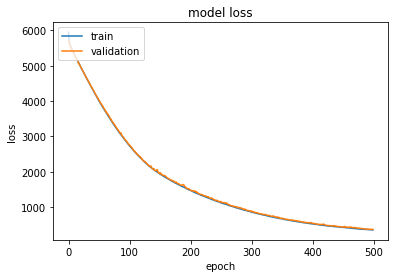

In [15]:
## And analyze the results:
test_mse_score, test_mae_score = net.evaluate(x_test, y_test)
print("Mean absolute error:",test_mae_score)
print("Mean squared error:",test_mse_score)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

When you compare this new graph with the graph from the same network, but with no regularization techniques, you will notice how closer the losses over time are closer to each other.